In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import matplotlib
import contextily as cx
import math
import numpy as np
import pandas as pd

In [2]:
gdf = gpd.read_file('/Users/ryanswart/Projects/PyProjects/DataTransfer/all_attrs', use_arrow=True)
from shapely.geometry import Polygon
bounds = Polygon([(-113, 34),(-113, 32.8),(-111.2, 32.8),(-111.2, 34)])

In [3]:
def percent_change(col1,col2):
    return ((col2 - col1) / col1) * 100

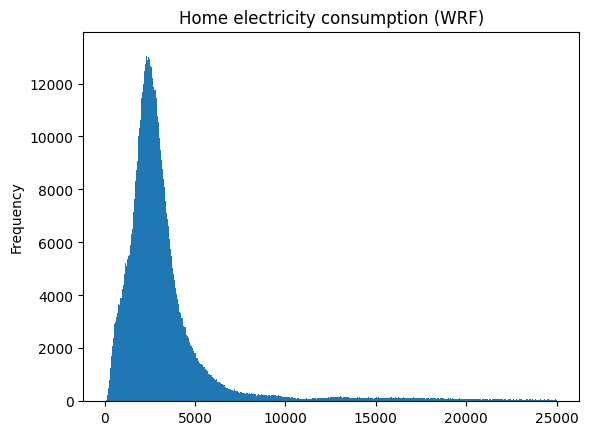

6832.885233783862


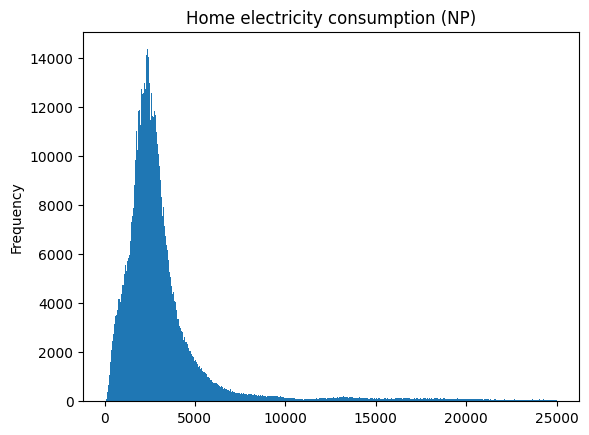

6794.418681582761


In [4]:
ax = gdf[gdf['Electricit'] < 25000]['Electricit'].plot.hist(bins=int(np.sqrt(len(gdf.index))-200))
ax.set_title('Home electricity consumption (WRF)')
plt.show()
print(gdf['Electricit'].mean())
ax = gdf[gdf['Electric_1'] < 25000]['Electric_1'].plot.hist(bins=int(np.sqrt(len(gdf.index))-200))
ax.set_title('Home electricity consumption (NP)')
plt.show()
print(gdf['Electric_1'].mean())

In [5]:
foo = gdf.groupby('geometry').sum().reset_index()
new_gdf = gpd.GeoDataFrame(foo, geometry=foo['geometry'])

16535
20669


<Axes: >

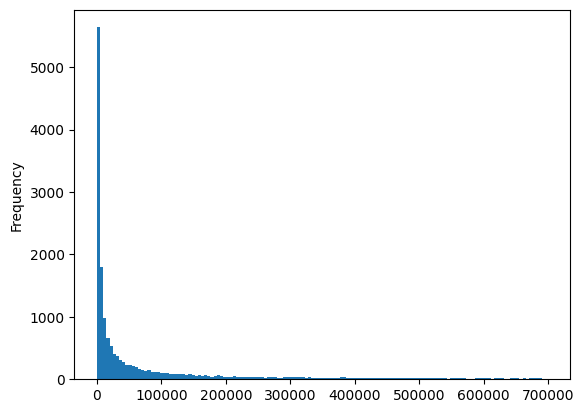

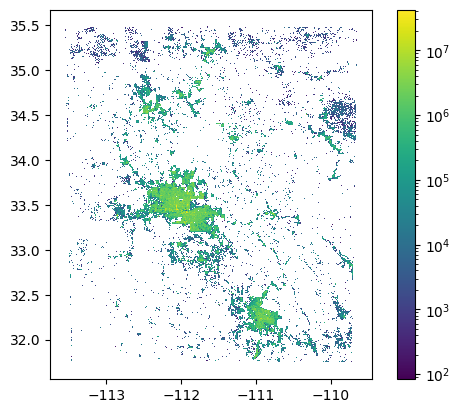

In [6]:
new_gdf[new_gdf['Electricit'] < 700000]['Electricit'].plot.hist(bins=int(np.sqrt(len(new_gdf.index))))
print((new_gdf['Electricit'] < 700000).sum())
print((new_gdf['Electricit'] > 0).sum())

new_gdf.plot(column='Electricit', legend=True, norm=matplotlib.colors.LogNorm(vmin=new_gdf['Electricit'].min(), vmax=new_gdf['Electricit'].max()))

(new_gdf[f'{key}_change'] > 1500).sum()=818
(new_gdf[f'{key}_change'] < -1500).sum()=0


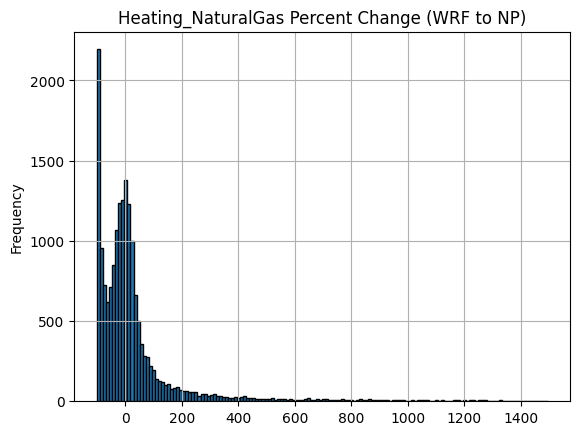

(new_gdf[f'{key}_change'] > 1500).sum()=0
(new_gdf[f'{key}_change'] < -1500).sum()=0


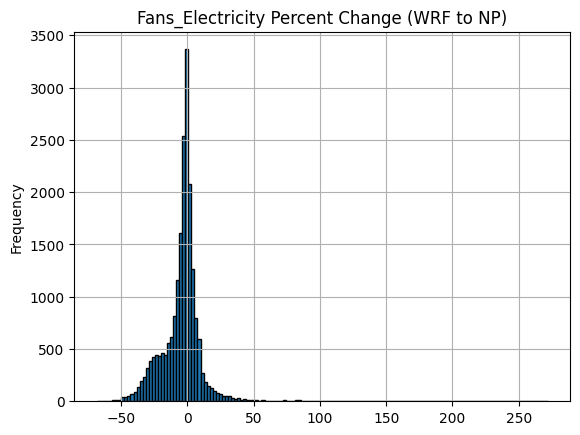

(new_gdf[f'{key}_change'] > 1500).sum()=0
(new_gdf[f'{key}_change'] < -1500).sum()=0


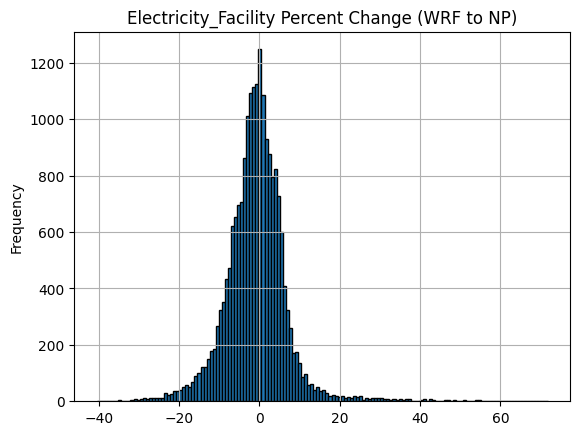

(new_gdf[f'{key}_change'] > 1500).sum()=0
(new_gdf[f'{key}_change'] < -1500).sum()=0


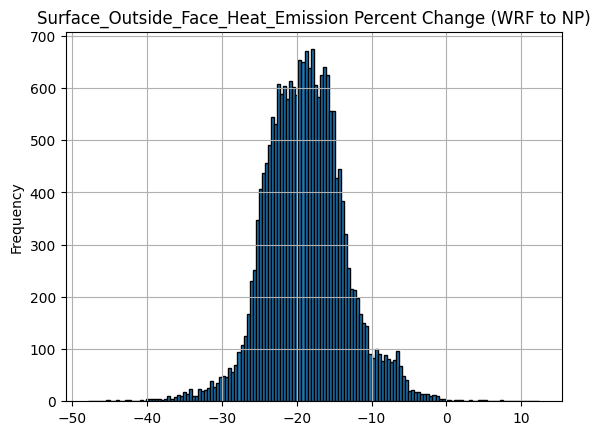

(new_gdf[f'{key}_change'] > 1500).sum()=0
(new_gdf[f'{key}_change'] < -1500).sum()=0


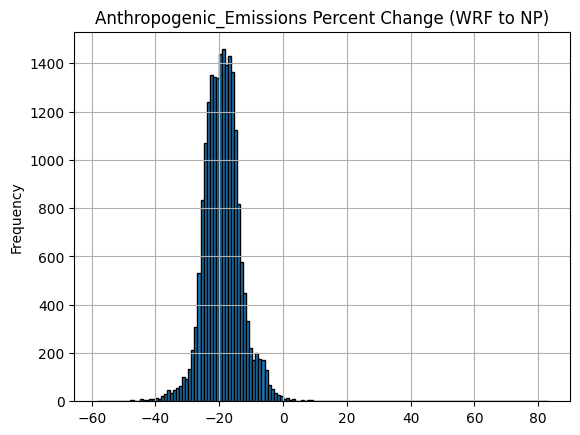

(new_gdf[f'{key}_change'] > 1500).sum()=1
(new_gdf[f'{key}_change'] < -1500).sum()=0


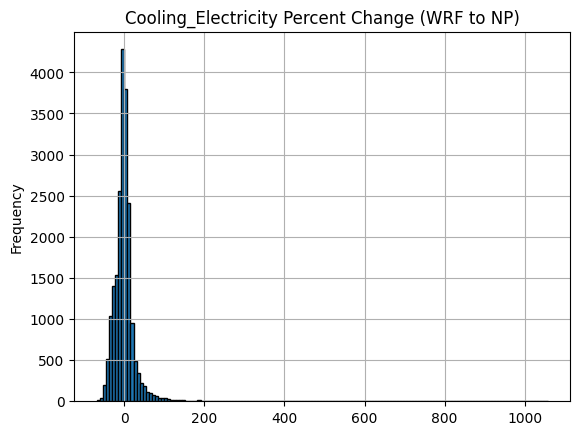

(new_gdf[f'{key}_change'] > 1500).sum()=387
(new_gdf[f'{key}_change'] < -1500).sum()=0


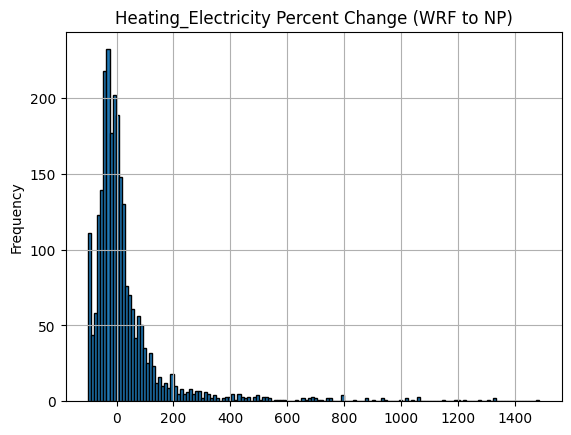

(new_gdf[f'{key}_change'] > 1500).sum()=761
(new_gdf[f'{key}_change'] < -1500).sum()=0


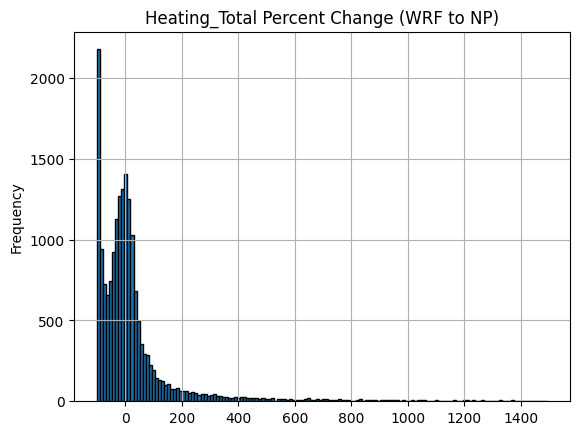

(new_gdf[f'{key}_change'] > 1500).sum()=179
(new_gdf[f'{key}_change'] < -1500).sum()=220


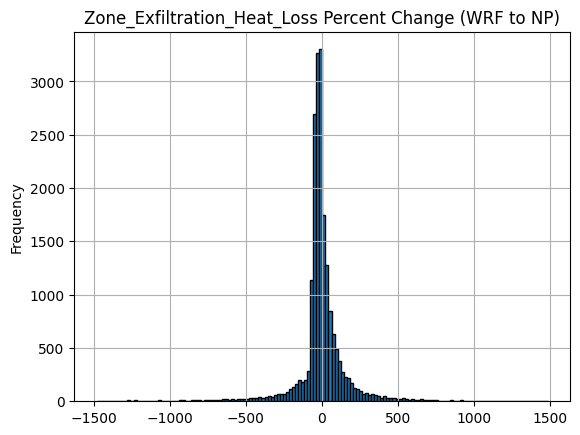

In [7]:
cols_dict = {
    'Heating_NaturalGas': ('Heating_Na', 'Heating__2'),
    'Fans_Electricity': ('Fans_Elect', 'Fans_Ele_1'),
    'Electricity_Facility': ('Electricit', 'Electric_1'),
    'Surface_Outside_Face_Heat_Emission': ('Surface_Ou', 'Surface__1'),
    'Anthropogenic_Emissions': ('Anthropoge', 'Anthropo_1'),
    'Cooling_Electricity': ('Cooling_El', 'Cooling__1'),
    'Heating_Electricity': ('Heating_El', 'Heating__1'),
    'Heating_Total': ('Heating_To', 'Heating__3'),
    'Zone_Exfiltration_Heat_Loss': ('Zone_Exfil', 'Zone_Exf_1'),
}

for key, val in cols_dict.items():
    new_gdf[f'{key}_change'] = percent_change(new_gdf[val[0]], new_gdf[val[1]])
    print(f"{(new_gdf[f'{key}_change'] > 1500).sum()=}")
    print(f"{(new_gdf[f'{key}_change'] < -1500).sum()=}")
    # [(new_gdf[f'{key}_change'] < 100) & (new_gdf[f'{key}_change'] > -100)]
    ax = new_gdf[(new_gdf[f'{key}_change'] < 1500) & (new_gdf[f'{key}_change'] > -1500)][f'{key}_change'].replace([np.inf, -np.inf], np.nan).dropna().plot.hist(edgecolor='black',
                                                                                                      bins=math.floor(
                                                                                                          math.sqrt(
                                                                                                              len(new_gdf.index))) + 5)
    ax.set_title(f'{key} Percent Change (WRF to NP)')
    ax.grid()
    plt.show()



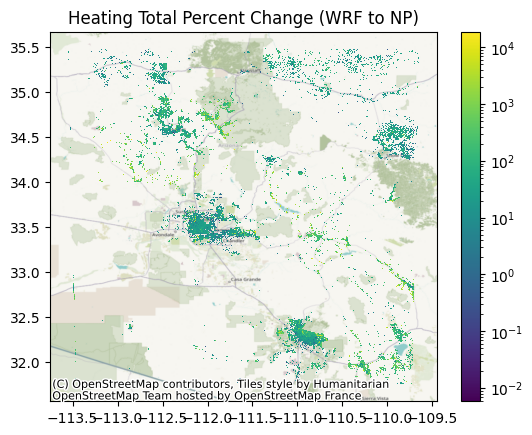

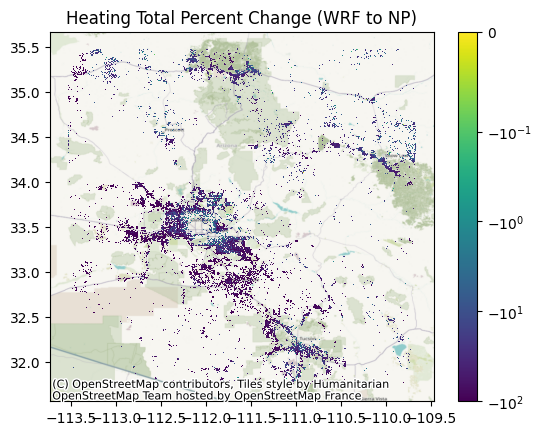

In [8]:
bar = new_gdf['Heating_Total_change'].replace([np.inf, -np.inf], np.nan).dropna()

foo = bar[(bar > 0) & (bar < 20_000)]
ax = new_gdf[(new_gdf['Heating_Total_change'] > 0) & (new_gdf['Heating_Total_change'] < 15_000)].plot(column='Heating_Total_change', legend=True, norm=matplotlib.colors.LogNorm(vmin=foo.min(), vmax=foo.max()))
cx.add_basemap(ax, crs="epsg:4326")
ax.set_title('Heating Total Percent Change (WRF to NP)')
plt.show()

foo = bar[(bar < 0)]
ax = new_gdf[(new_gdf['Heating_Total_change'] < 0)].plot(column='Heating_Total_change', legend=True, norm=matplotlib.colors.SymLogNorm(linthresh=.1, vmin=foo.min(), vmax=0))
ax.set_title('Heating Total Percent Change (WRF to NP)')
cx.add_basemap(ax, crs="epsg:4326")
plt.show()